<a href="https://colab.research.google.com/github/Rezquellah/ML-Intro/blob/main/Linear_Regression_Scratchbook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np 
import matplotlib.pyplot as plt

Text(0, 0.5, 'Mouse Height')

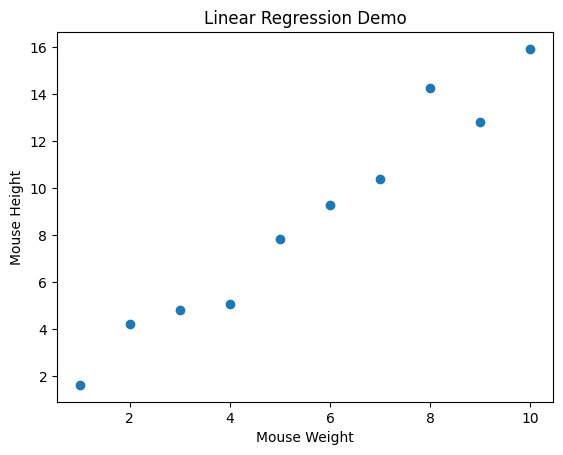

In [12]:
# Generate 10 data points with some noise
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([2, 4, 5, 7, 8, 10, 11, 13, 14, 16])
noise = np.random.normal(0, 1, 10)
y = y + noise

plt.scatter(x, y)
plt.title('Linear Regression Demo')
plt.xlabel('Mouse Weight')
plt.ylabel('Mouse Height')


In [14]:
x.shape

(10,)

In [15]:
y.shape

(10,)

There is a linear relationshop between x and y. 

model = y = a.x + b

If we can find a and b, we can estimate the value of y.

to start we will give random numbers for a and b.


In [43]:
# Generate random coefficients  "a" and "b" for the line
a = np.random.randn()+1
b = np.random.randn()+1.5
model = a*x + b

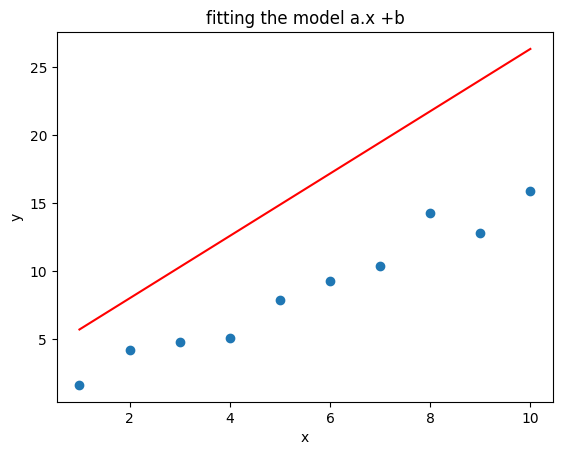

In [45]:
# Plot the data and the line
plt.scatter(x, y)
plt.plot(x, model, color='red')
plt.title('fitting the model a.x +b')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

As shown on the above scatter plot, the model don't fit the data well, in other word our model made some errors and those error can be quantified, and the mean mission in machine learning is to reduce those error. 

There is many ways to calculate the errors, in this tutorial i used the MSE. 

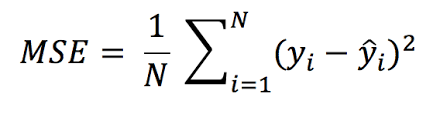

So in our example to calculate the error the formula will be 

MSE = (1/10) * sum((y - model)^2)

In [46]:
# Calculate the error between the line and the actual values
error = np.sum((model - y)**2)
error

602.7829743806996

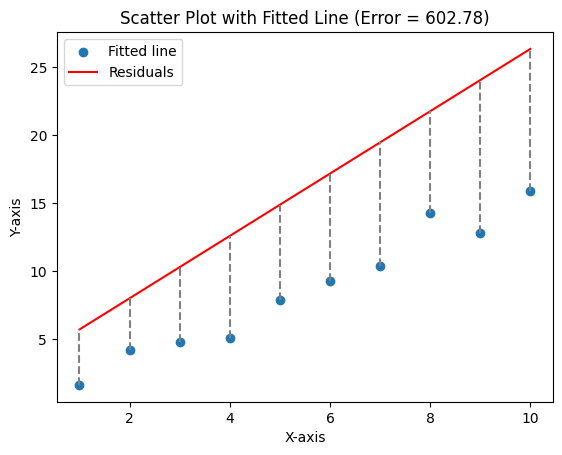

In [47]:
# Plot the data and the line
plt.scatter(x, y)
plt.plot(x, model, color='red')

# Add dashed lines to the plot
for i in range(len(x)):
    plt.plot([x[i], x[i]], [y[i], model[i]], linestyle='--', color='gray')

# Add title, axis labels, and legend
plt.title('Scatter Plot with Fitted Line (Error = {:.2f})'.format(error))
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(['Fitted line', 'Residuals'])
plt.show()

If we could reduce the distance between the blue point and the line we will have the best model that can predict the value of Y given X, so the objectif now is to find the best coefficients a and b.

We will use the Gradient descent algorithm to reduce the MSE error 602.78

In [55]:
# Initialize the values of a and b
a = np.random.randn()+1
b = np.random.randn()+1.5

# Set the learning rate and maximum number of iterations
learning_rate = 0.01
max_iterations = 1000

# Perform gradient descent
for i in range(max_iterations):
    # Calculate the predicted values of y
    m1 = a + b * x

    # Calculate the gradient of the MSE with respect to a and b
    grad_a = np.mean(2 * (m1 - y))
    grad_b = np.mean(2 * x * (m1 - y))

    # Update the values of a and b
    a = a - learning_rate * grad_a
    b = b - learning_rate * grad_b

    # Calculate the error between the predicted and actual values
    error = np.sum((m1 - y)**2)

    # Print the error every 100 iterations
    if i % 100 == 0:
        print('Iteration {}: error = {:.2f}'.format(i, error))

Iteration 0: error = 42.27
Iteration 100: error = 7.89
Iteration 200: error = 7.73
Iteration 300: error = 7.67
Iteration 400: error = 7.64
Iteration 500: error = 7.62
Iteration 600: error = 7.62
Iteration 700: error = 7.62
Iteration 800: error = 7.61
Iteration 900: error = 7.61


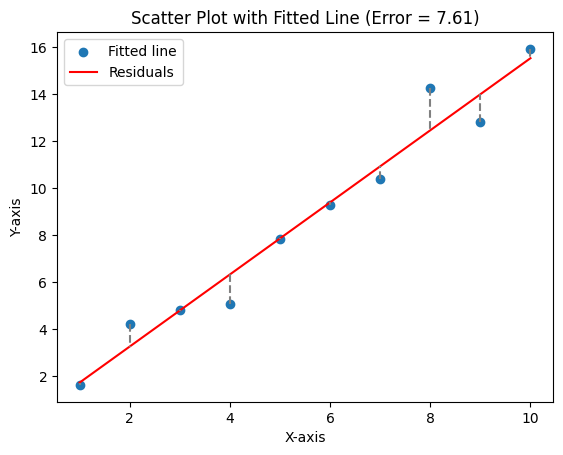

In [57]:
# Calculate the predicted values of y
m1 = a + b * x

# Plot the data and the line
plt.scatter(x, y)
plt.plot(x, m1, color='red')

# Add dashed lines to the plot
for i in range(len(x)):
    plt.plot([x[i], x[i]], [y[i], m1[i]], linestyle='--', color='gray')

# Add title, axis labels, and legend
plt.title('Scatter Plot with Fitted Line (Error = {:.2f})'.format(error))
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(['Fitted line', 'Residuals'])
plt.show()

We reduced the error from 602.78 to 7.61, now we will calculate the R2.

R-squared (R2) is a statistical measure that represents the proportion of variance in the dependent variable that is explained by the independent variable(s) in a regression model. It ranges from 0 to 1, with higher values indicating a better fit of the model to the data.

R2 is commonly used as an evaluation metric for regression models. It provides a measure of how well the model fits the data and can be used to compare the performance of different regression models. A high R2 value indicates that a larger proportion of the variance in the dependent variable is explained by the independent variable(s) in the model, while a low R2 value indicates that the model does not explain much of the variance in the dependent variable.

An R-squared (R2) value of 0.96 indicates that 96% of the variance in the dependent variable is explained by the independent variable(s) in the regression model. This is considered to be a very high R2 value and suggests that the model is a good fit for the data.

In [61]:
# Calculate the total sum of squares (TSS)
y_mean = np.mean(y)
TSS = np.sum((y - y_mean)**2)

# Calculate the residual sum of squares (RSS)
RSS = np.sum((y - m1)**2)

# Calculate R2
R2 = 1 - (RSS / TSS)

print('R2 = {:.2f}'.format(R2))

R2 = 0.96


In [68]:
new_x = 4
prediction = a * new_x + b
prediction

2.3097761979468823

In [69]:
from sklearn.linear_model import LinearRegression

In [74]:
# Generate 10 data points with some noise
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
y = np.array([2, 4, 5, 7, 8, 10, 11, 13, 14, 16]).reshape(-1, 1)
noise = np.random.normal(0, 1, (10, 1))
y = y + noise


In [75]:
model = LinearRegression()

In [76]:
model.fit(x,y)

LinearRegression()

In [79]:
# Use the model to make predictions on new data
X_new = np.array([[4], [5], [10]])
y_pred = model.predict(X_new)

print(y_pred)

[[ 6.62634795]
 [ 8.26951242]
 [16.48533476]]


In [83]:
# Get the coefficients
coef = model.coef_
intercept = model.intercept_

print('Coefficient:', coef)
print('Intercept:', intercept)

Coefficient: [[1.64316447]]
Intercept: [0.05369008]


In [84]:
from sklearn.metrics import r2_score

r2 = model.score(x, y)

print('R2 score:', r2)

R2 score: 0.9507227987985369
